# Question 1: Do customer ratings change based on general weather conditions?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
# Load merged file
merged = pd.read_csv("reviews_with_weather.csv")
print(merged.head())

      Rating  Clean_Date              Location  NumericRating  \
0  4.3 stars  2025-03-29     Starbucks Reserve            4.0   
1  4.3 stars  2025-03-27     Starbucks Reserve            4.0   
2    3 stars  2025-03-27  Upstairs at the Gwen            3.0   
3  4.1 stars  2025-03-24     Starbucks Reserve            4.0   
4  4.6 stars  2025-03-22        Café Con Leche            4.0   

               City      Date_y  Temp Max (°F)  Temp Min (°F)  Avg Temp (°F)  \
0  Chicago Illinois  2025-03-29           69.4           47.2           62.4   
1  Chicago Illinois  2025-03-27           54.7           43.5           49.3   
2  Chicago Illinois  2025-03-27           54.7           43.5           49.3   
3  Chicago Illinois  2025-03-24           49.5           34.7           41.3   
4  Chicago Illinois  2025-03-22           51.5           34.6           40.8   

   Feels Like Temp (°F)  Humidity (%)  Precipitation (in)  Snow (in)  \
0                  62.2          70.2               0.03

In [11]:
print(merged.columns)

Index(['Rating', 'Clean_Date', 'Location', 'NumericRating', 'City', 'Date_y',
       'Temp Max (°F)', 'Temp Min (°F)', 'Avg Temp (°F)',
       'Feels Like Temp (°F)', 'Humidity (%)', 'Precipitation (in)',
       'Snow (in)', 'Snow Depth (in)', 'Wind Speed (mph)', 'Cloud Cover (%)',
       'Visibility (mi)', 'UV Index', 'Severe Weather Risk', 'Conditions'],
      dtype='object')


In [13]:
# Group Conditions and calculate average Rating
avg_rating_by_weather = merged.groupby("Conditions")["NumericRating"].mean().sort_values(ascending=False)
print(avg_rating_by_weather)

Conditions
Rain      3.960000
Sunny     3.933333
Cloudy    3.822430
Snow      3.708333
Name: NumericRating, dtype: float64


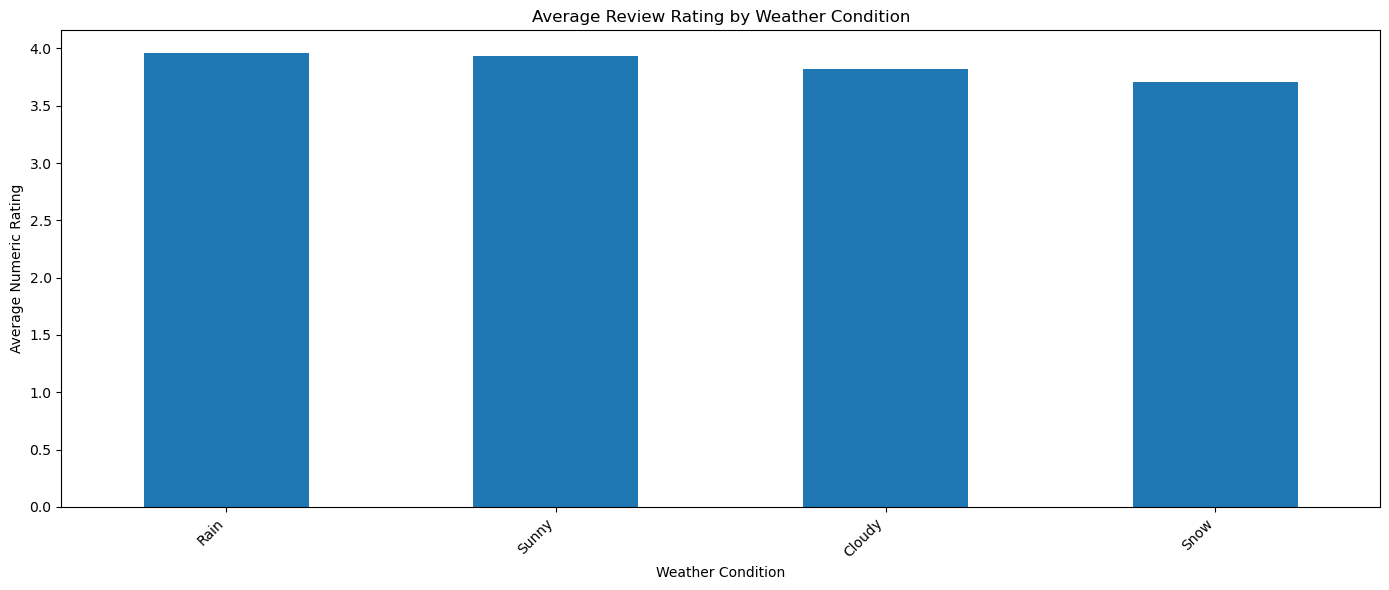

In [15]:
# Plot the results
avg_rating_by_weather.plot(kind="bar", figsize=(14,6))
plt.title("Average Review Rating by Weather Condition")
plt.ylabel("Average Numeric Rating")
plt.xlabel("Weather Condition")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [17]:
# anova fit
fit = ols("NumericRating ~ Conditions", data=merged).fit()

In [19]:
# table
anova_table = sm.stats.anova_lm(fit, typ=2)  # Type 2 ANOVA
print(anova_table)

                sum_sq     df         F    PR(>F)
Conditions    0.937370    3.0  0.309716  0.818343
Residual    168.477835  167.0       NaN       NaN


In [21]:
# p-value
p_value = anova_table["PR(>F)"].iloc[0]
print(f"P-value: {p_value:.8f}")

P-value: 0.81834266


In [23]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0: The average customer ratings are significantly different across weather conditions.")
else:
    print("Fail to reject H0: No significant difference in average customer ratings across weather conditions.")

Fail to reject H0: No significant difference in average customer ratings across weather conditions.


# Question 2: Can customer review ratings be predicted based on temperature?

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from scipy.stats import shapiro

# load and clean data
merged = pd.read_csv('reviews_with_weather.csv')
merged['Rating'] = merged['Rating'].str.replace(' stars', '', regex=False)
merged['Rating'] = merged['Rating'].str.replace(' star', '', regex=False)
merged['Rating'] = merged['Rating'].astype(float)

Linear Regression R² score: 0.0003
Shapiro-Wilk Test: statistic = 0.7163, p-value = 0.000000
Residuals are not normally distributed.


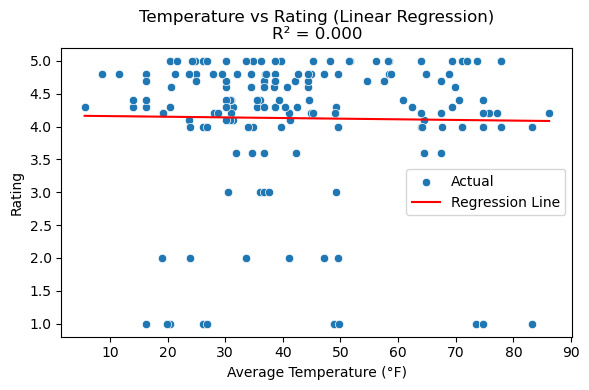

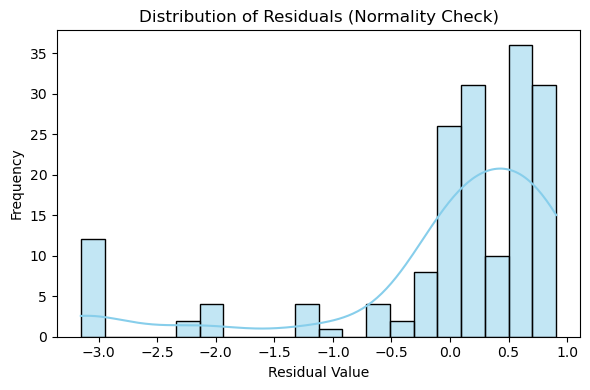


Model Comparison:
    Model  R² Score
0  Linear  0.000306
1   Ridge  0.000306
2   Lasso  0.000282


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from scipy.stats import shapiro

# Load and clean data
merged = pd.read_csv('reviews_with_weather.csv')
merged['Rating'] = merged['Rating'].str.replace(' stars', '', regex=False)
merged['Rating'] = merged['Rating'].str.replace(' star', '', regex=False)
merged['Rating'] = merged['Rating'].astype(float)

# Define X and y
X = merged[['Avg Temp (°F)']]  
y = merged['Rating']

# Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"Linear Regression R² score: {r2:.4f}")

# Shapiro-Wilk Test on residuals
residuals = y - y_pred
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro-Wilk Test: statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.6f}")
if shapiro_p > 0.05:
    print("Residuals are approximately normally distributed.")
else:
    print("Residuals are not normally distributed.")

# scatter plot with regression line
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Avg Temp (°F)', y='Rating', data=merged, label='Actual')
sns.lineplot(x=merged['Avg Temp (°F)'], y=y_pred, color='red', label='Regression Line')
plt.title(f'Temperature vs Rating (Linear Regression)\nR² = {r2:.3f}')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Rating')
plt.legend()
plt.tight_layout()
plt.show()

# histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=20, color='skyblue')
plt.title('Distribution of Residuals (Normality Check)')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# ridge 
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
ridge_pred = ridge.predict(X)
ridge_r2 = r2_score(y, ridge_pred)

# lasso 
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso_pred = lasso.predict(X)
lasso_r2 = r2_score(y, lasso_pred)

# compare the models
results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'R² Score': [r2, ridge_r2, lasso_r2]
})

print("\nModel Comparison:")
print(results)

In [34]:
print(merged_df.columns)


Index(['Date_x', 'Rating', 'Clean_Date', 'Location', 'NumericRating', 'City',
       'Date_y', 'Temp Max (°F)', 'Temp Min (°F)', 'Avg Temp (°F)',
       'Feels Like Temp (°F)', 'Humidity (%)', 'Precipitation (in)',
       'Snow (in)', 'Snow Depth (in)', 'Wind Speed (mph)', 'Cloud Cover (%)',
       'Visibility (mi)', 'UV Index', 'Severe Weather Risk', 'Conditions'],
      dtype='object')


# Question 3: Do customer ratings vary between different restaurant locations?

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [35]:
# load files
merged = pd.read_csv("reviews_with_weather.csv")

In [39]:
# clean data columns
merged['Rating'] = merged['Rating'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

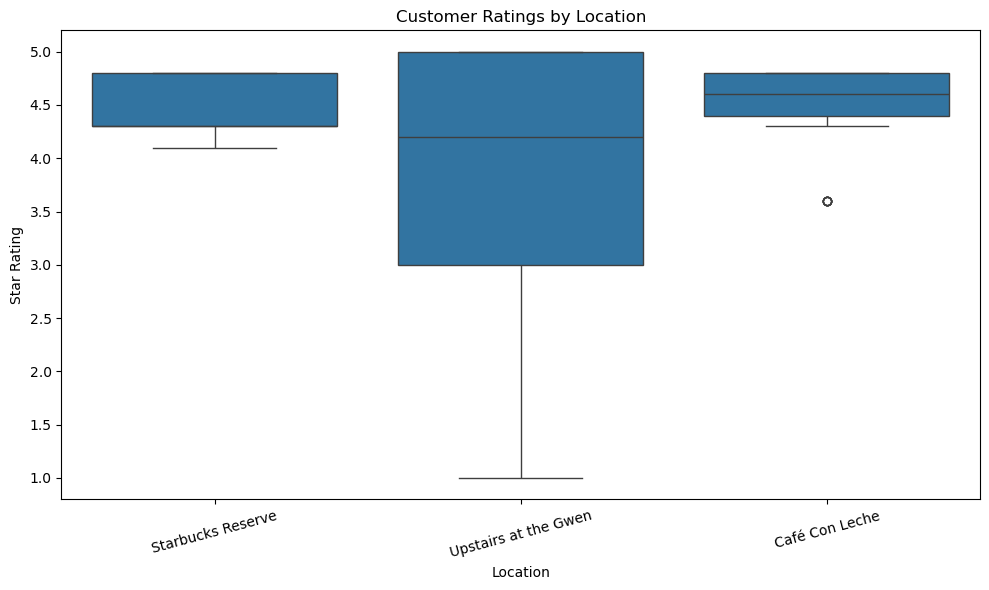

In [41]:
# plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Rating', data=merged)
plt.title("Customer Ratings by Location")
plt.xlabel("Location")
plt.ylabel("Star Rating")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [43]:
# group ratings by location
reserve = merged[merged['Location'] == 'Starbucks Reserve']['Rating']
gwen = merged[merged['Location'] == 'Upstairs at the Gwen']['Rating']
leche = merged[merged['Location'] == 'Café Con Leche']['Rating']

In [47]:
# anova
f_stat, p_val = f_oneway(reserve, gwen, leche)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.7f}")

F-statistic: 10.059
P-value: 0.0000748
